In [1]:
pip install papermill


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install papermill


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

# Maturities in years
maturities = np.array([0.5, 1, 2, 3, 5, 10, 15, 20,])

# Yields corresponding to those maturities (in %)
yields = np.array([13.9, 15.4, 15.8, 16.3, 16.5, 16.8, 17.1, 17.6])

In [9]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    """Nelson-Siegel yield curve function"""
    term1 = (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term2 = term1 - np.exp(-lambd * tau)
    return beta0 + beta1 * term1 + beta2 * term2

In [11]:
from scipy.optimize import curve_fit

# Initial guess for parameters: [beta0, beta1, beta2, lambda]
initial_guess = [17.6, -3.7, 2.0, 0.5]

# Fit the curve
params, covariance = curve_fit(nelson_siegel, maturities, yields, p0=initial_guess)

# Extract fitted parameters
beta0, beta1, beta2, lambd = params
print(f"Fitted parameters:\n beta0={beta0:.4f}, beta1={beta1:.4f}, beta2={beta2:.4f}, lambda={lambd:.4f}")

Fitted parameters:
 beta0=17.2834, beta1=-4.9212, beta2=0.0000, lambda=1.8110


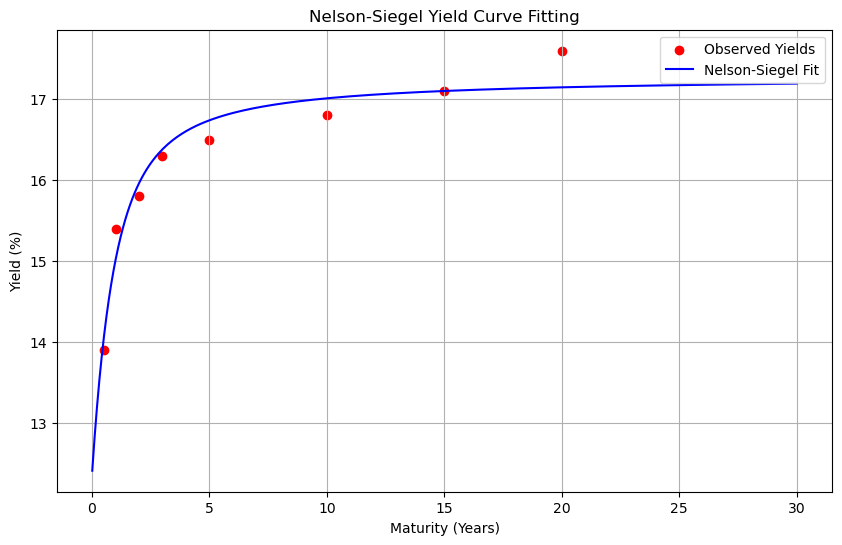

In [13]:
import matplotlib.pyplot as plt

# Generate smooth curve for plotting
tau_fine = np.linspace(0.01, 30, 300)
fitted_yields = nelson_siegel(tau_fine, beta0, beta1, beta2, lambd)

plt.figure(figsize=(10,6))
plt.scatter(maturities, yields, color='red', label='Observed Yields')
plt.plot(tau_fine, fitted_yields, label='Nelson-Siegel Fit', color='blue')
plt.title('Nelson-Siegel Yield Curve Fitting')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [17]:
cs = CubicSpline(maturities, yields)

In [19]:
maturities_fine = np.linspace(0.5, 20, 100)  # create smooth points
yields_fitted = cs(maturities_fine)